<font color='blue'> Привет. Извини за долгую проверку. Ниже мои комментарии выделены синим. </font>

# <a name="table_of_contents"></a><font color="red">Задачи исследования</font>
---

# [Шаг №1. Загрузите данные и подготовьте их к анализу](#stage_1)
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.

- Путь к файлу: /datasets/rest_data.csv

---

# [Шаг №2. Анализ данных](#stage_2)
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

1. [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график](#stage_2_1)

---

2. [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график](#stage_2_2)

---

3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#stage_2_3)

---

4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#stage_2_4)

---

5. [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики](#stage_2_5)

---

6. [Выделите в отдельный столбец информацию об улице из столбца address](#stage_2_6)

---

7. [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#stage_2_7)

--- 

8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения](#stage_2_8)

---

9. [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#stage_2_9)

---


# [Шаг №3. Подготовка презентации](#stage_3)
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:
Презентация: <ссылка на облачное хранилище с презентацией>

1. [Презентация](#stage_3)

# Описание данных
## Файл rest_data.csv:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

<a name="stage_1"></a>
# Шаг №1. Загрузите данные и подготовьте их к анализу

[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import requests

import scipy.stats as stats
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint
import json


import math
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')

In [4]:
# df.info()
# df.head()
# df.isna().sum()
# df.duplicated().sum()
# df['____'].unique()
# np.unique(df[['chain', 'object_type']].values) NB

In [5]:
df = df.rename(columns={'number':'number_of_seats'})

In [6]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [7]:
symbols = [',', '«', '»', '(', ')', '"', '  ']

In [8]:
for s in symbols:
    df['object_name'] = df['object_name'].str.replace(s, ' ')
    df['address'] = df['address'].str.replace(s, ' ')

In [9]:
df['chain'] = df['chain'].map({'нет':'несетевое','да':'сетевое'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['address'] = df['address'].str.replace('ё','е')

In [10]:
df.duplicated().sum()

0

Привели к нижнему регистру, переименовали столбец, посмотрели инфо по всему фрейму, попробовали почистить дубли, но все равно дублей не нашли. Ну и длинные наименования заменили на короткие. У нас есть заведения, где посадочных мест, но это могут быть какие-нибудь дарк-китчены или рюмочные, оставим, как есть.

<a name="stage_2"></a>
# Шаг №2. Анализ данных
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

[К оглавлению](#table_of_contents)

<a name="stage_2_1"></a>
## 1. Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график
---
[К оглавлению](#table_of_contents)

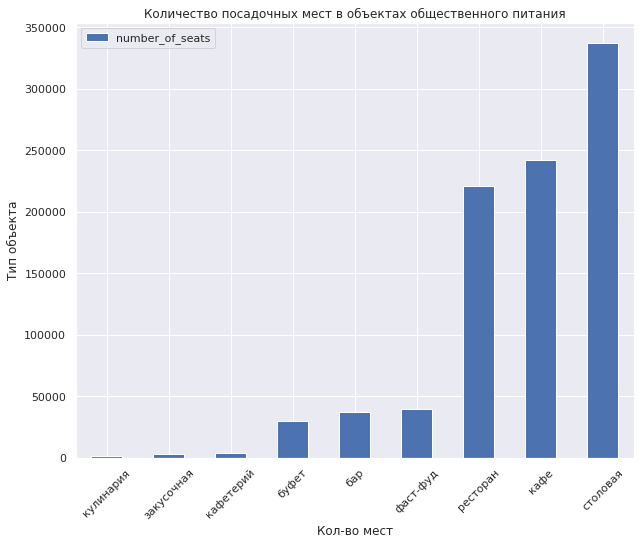

In [11]:
temp = df.groupby('object_type').sum().reset_index()
ax = temp[['object_type', 'number_of_seats']].set_index('object_type').sort_values('number_of_seats', ascending=True).plot(kind='bar')
ax.set_xlabel('Кол-во мест')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество посадочных мест в объектах общественного питания')
plt.xticks(rotation=45)
plt.show()

In [12]:
temp[['object_type', 'number_of_seats']].sort_values(by='number_of_seats').rename(columns={'number_of_seats': 'total_seats'})

,object_type,total_seats
5,кулинария,1526
2,закусочная,2739
4,кафетерий,3631
1,буфет,29911
0,бар,37231
8,фаст-фуд,39522
6,ресторан,221266
3,кафе,242228
7,столовая,336948


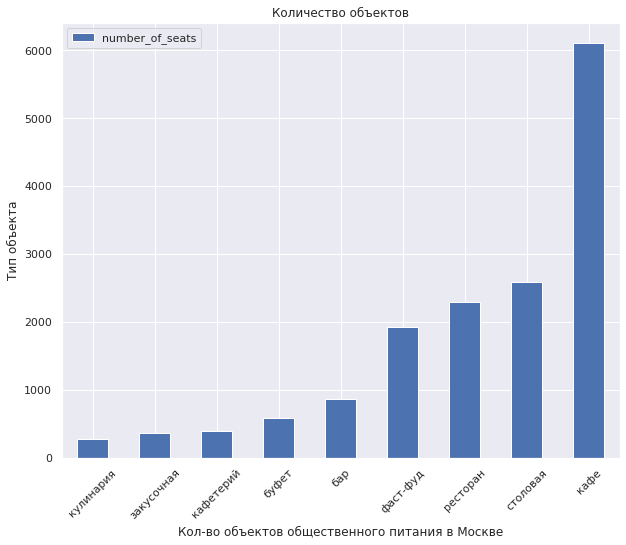

In [13]:
temp = df.groupby('object_type').count().reset_index()
ax = temp[['object_type', 'number_of_seats']].set_index('object_type').sort_values('number_of_seats', ascending=True).plot(kind='bar')
ax.set_xlabel('Кол-во объектов общественного питания в Москве')
ax.set_ylabel('Тип объекта')
ax.set_title('Количество объектов')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.groupby('object_type')['object_name'].count().sort_values()

object_type
кулинария      273
закусочная     360
кафетерий      398
буфет          585
бар            856
фаст-фуд      1923
ресторан      2285
столовая      2587
кафе          6099
Name: object_name, dtype: int64

Ну очень много кафе, рестораны, столовые и фастфуды — в топе, остальных сильно меньше.

<font color='blue'> Хорошо, только стоит более подробно описывать действия. </font>

<a name="stage_2_2"></a>
## 2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график
---
[К оглавлению](#table_of_contents)

In [15]:
df.groupby('chain')['object_name'].count().sort_values()

chain
сетевое       2968
несетевое    12398
Name: object_name, dtype: int64

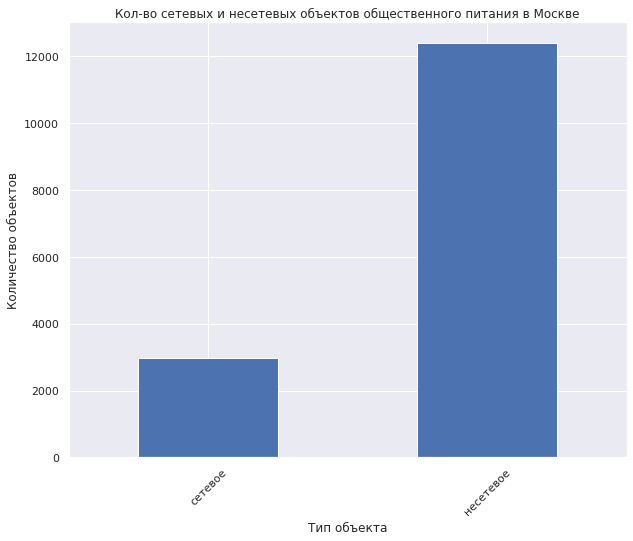

In [16]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

Сетевых в 4 раза меньше.

<a name="stage_2_3"></a>
## 3. Для какого вида объекта общественного питания характерно сетевое распространение?
---
[К оглавлению](#table_of_contents)

In [17]:
net = 'сетевое'

In [18]:
temp = df.query('chain == @net')

In [19]:
net_is = temp['object_type'].unique().tolist()
net_is

['кафе',
 'фаст-фуд',
 'ресторан',
 'кулинария',
 'кафетерий',
 'закусочная',
 'бар',
 'буфет',
 'столовая']

In [20]:
temp.groupby('object_type')['object_name'].count().sort_values()

object_type
столовая         3
буфет           11
бар             37
кафетерий       52
закусочная      56
кулинария       78
ресторан       544
фаст-фуд       791
кафе          1396
Name: object_name, dtype: int64

Кафе, фаст-фуд, ресторан лидируют в сетевых.

<font color='blue'> Не совсем верно. Здесь надо было посмотреть не процент от сетевых заведений, а наоборот процент сетевых заведений среди данного типа. Например если из 100 ресторанов только 30 сетевый, а из 10 кафетериев 7 сеетвых, то для кафетериев сетевая принадлежность будет более характерна, хотя их меньше. </font>

<a name="stage_2_4"></a>
## 4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
---
[К оглавлению](#table_of_contents)

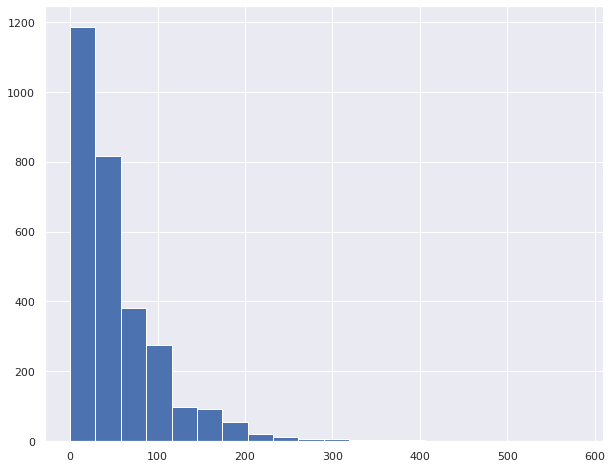

In [21]:
temp['number_of_seats'].hist(bins=20)
plt.show()

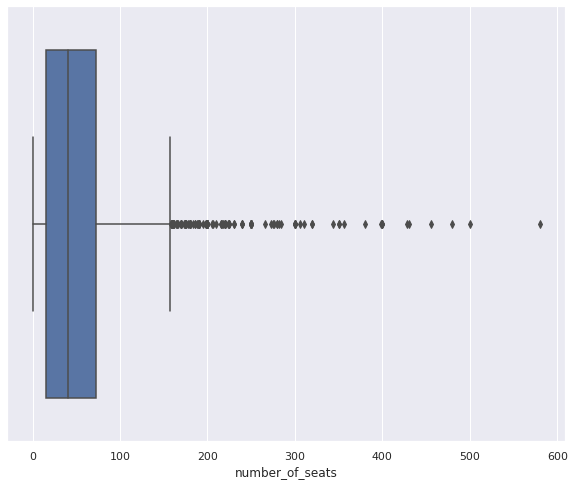

In [22]:
ax = sns.boxplot(x=temp['number_of_seats'])

In [23]:
temp['number_of_seats'].describe()

count   2,968.00
mean       52.92
std        57.14
min         0.00
25%        15.00
50%        40.00
75%        72.00
max       580.00
Name: number_of_seats, dtype: float64

Много заведений и мало мест.

<font color='blue'> Верно. </font>

<a name="stage_2_5"></a>
## 5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики
---
[К оглавлению](#table_of_contents)

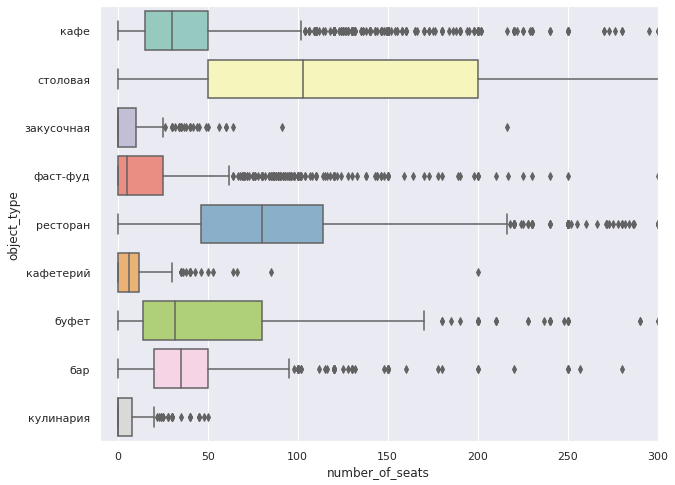

In [24]:
ax = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette="Set3")
ax.set_xlim(-10,300)
plt.show()

In [25]:
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,360.00,7.61,16.65,0.00,0.00,0.00,10.00,216.00
кулинария,273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00
фаст-фуд,"1,923.00",20.55,38.37,0.00,0.00,5.00,25.00,580.00
кафетерий,398.00,9.12,14.64,0.00,0.00,6.00,12.00,200.00
кафе,"6,099.00",39.72,37.72,0.00,15.00,30.00,50.00,533.00
буфет,585.00,51.13,56.33,0.00,14.00,32.00,80.00,320.00
бар,856.00,43.49,67.08,0.00,20.00,35.00,50.00,"1,700.00"
ресторан,"2,285.00",96.83,94.76,0.00,46.00,80.00,114.00,"1,500.00"
столовая,"2,587.00",130.25,95.18,0.00,50.00,103.00,200.00,"1,400.00"


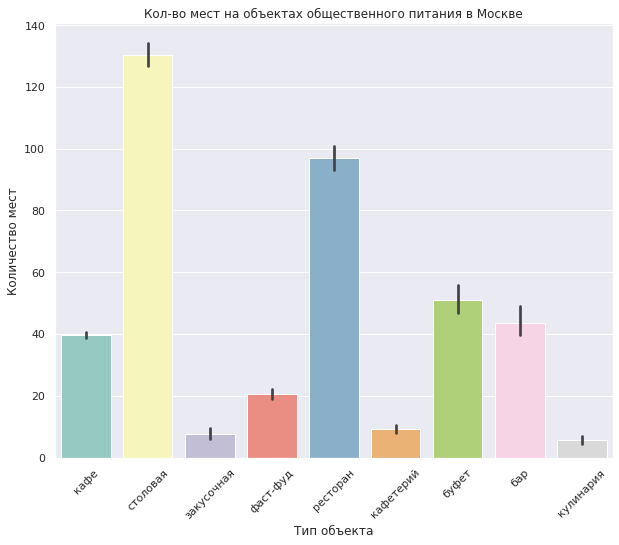

In [26]:
ax = sns.barplot(x='object_type', y='number_of_seats', data=df, palette="Set3")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

У столовой полный порядок, у ресторанов тоже хорошо — есть, где присесть.

<font color='blue'> Хорошо, все правильно, хорошо подобрангы типы графиков. </font>

<a name="stage_2_6"></a>
## 6. Выделите в отдельный столбец информацию об улице из столбца address
---
[К оглавлению](#table_of_contents)

In [27]:
streets = df['address'].to_list()

In [28]:
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+12:end-1])

In [29]:
df['street_name'] = streets_only

In [30]:
df.head(20)

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,сметана,несетевое,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,несетевое,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе академия,несетевое,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе вишневая метель,несетевое,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевое,столовая,город москва абрамцевская улица дом 15 корпус 1,240,абрамцевская улица
6,148815,брусника,сетевое,кафе,город москва переулок сивцев вражек дом 6/2,10,переулок сивцев вражек
7,20957,буфет мтуси,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,90,авиамоторная улица
8,20958,кпф семья-1,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,150,авиамоторная улица
9,28858,столовая мтуси,несетевое,столовая,город москва авиамоторная улица дом 8 строение 1,120,авиамоторная улица


In [31]:
df[df['street_name'] == ''].count()

id                 10
object_name        10
chain              10
object_type        10
address            10
number_of_seats    10
street_name        10
dtype: int64

10 улиц потерялось, хотя под паттерн они вроде попадают. Пойдем дальше, но будем иметь в виду.

In [32]:
df[df['street_name'] == '']

,id,object_name,chain,object_type,address,number_of_seats,street_name
335,21268,центр социального обеспечения,несетевое,столовая,город москва домодедовская улица дом 24 корпус 4,35,
3654,72236,пончики,несетевое,фаст-фуд,город москва домостроительная улица дом 1 корп...,4,
3693,29030,гбоу школа 548 кдп,несетевое,столовая,город москва домодедовская улица дом 35 корпус 2,150,
4040,29023,гбоу школа 1207 кдп,несетевое,столовая,город москва домодедовская улица дом 24 корпус 7,200,
4068,157787,донеретто,несетевое,фаст-фуд,город москва домодедовская улица дом 25 корпус 1,0,
4082,153147,пекарня пепела,несетевое,фаст-фуд,город москва домодедовская улица дом 28,0,
9542,164788,пиццерия,несетевое,фаст-фуд,город москва домодедовская улица дом 28,0,
10069,171720,django lounge кальян-бар,несетевое,бар,город москва домостроительная улица дом 1 корп...,70,
12106,177805,додо пицца,сетевое,кафе,город москва домодедовская улица дом 42а,9,
12298,201629,шаурма,несетевое,фаст-фуд,город москва домодедовская улица дом 42,0,


<a name="stage_2_7"></a>
## 7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
--- 
[К оглавлению](#table_of_contents)

In [33]:
temp = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,id,object_name,chain,object_type,address,number_of_seats
0,проспект мира,204,204,204,204,204,204
1,профсоюзная улица,182,182,182,182,182,182
2,ленинградский проспект,170,170,170,170,170,170
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,155,155,155,155,155,155
5,ленинский проспект,147,147,147,147,147,147
6,проспект вернадского,131,131,131,131,131,131
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,103,103,103,103,103,103
9,ходынский бульвар,102,102,102,102,102,102


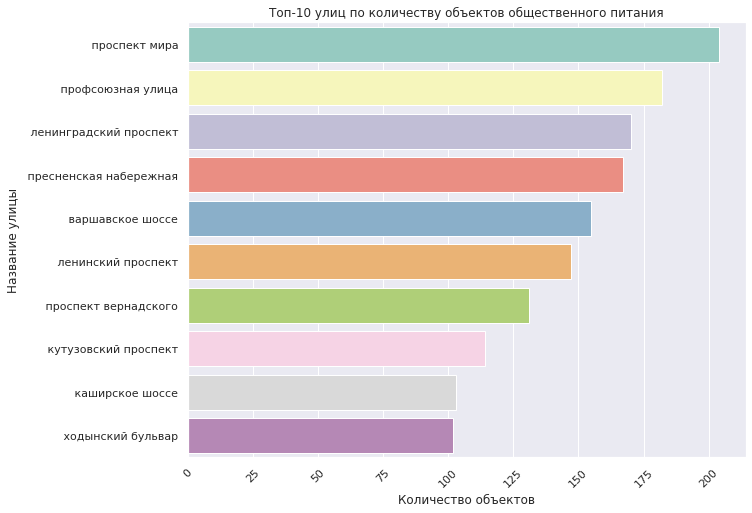

In [34]:
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="Set3")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

<font color='blue'>Все верно. </font>

### Воспользуемся Гуглом:
- Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
- Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
- Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
- Пресненская набережная: Пресненский
- Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
- Ленинский проспект: Гагаринский и Донской
- Проспект Вернадского: Проспект Вернадского
- Кутузовский проспект: Дорогомилово, Фили-Давыдково
- Каширское шоссе: Нагатино-Садовники и Нагорный
- Ходынский бульвар: Хорошёвский

<a name="stage_2_8"></a>
## 8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
---
[К оглавлению](#table_of_contents)

In [35]:
temp = df.groupby('street_name').count()
len(temp.query('id == 1'))

813

In [36]:
temp = temp.query('id == 1')
temp = temp.reset_index()

In [37]:
deadloss = list(temp['street_name'])

In [38]:
deadloss = df[df['street_name'].isin(deadloss)]

In [39]:
deadloss

,id,object_name,chain,object_type,address,number_of_seats,street_name
19,153644,американская лаборатория десертов,несетевое,кафе,город москва филипповский переулок дом 15/5,20,филипповский переулок
61,21214,столовая,несетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица
69,22139,хуанхэ,несетевое,ресторан,город москва 1-й балтийский переулок дом 3/25,60,1-й балтийский переулок
81,25833,азербайджан,несетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного
131,150881,вгик,несетевое,столовая,город москва будайская улица дом 3,45,будайская улица
...,...,...,...,...,...,...,...
15015,208239,газпромнефть,несетевое,кафе,поселение мосрентген деревня дудкино владение 1,20,осрентген деревня дудкино владение
15016,221225,пекарня есть поесть,несетевое,кафе,город москва поселение сосенское поселок комму...,16,поселение сосенское поселок коммунарка улица ...
15017,205588,кофейня,несетевое,кафетерий,город москва поселение щаповское улица евгения...,16,поселение щаповское улица евгения родионова в...
15027,208936,кафе гурман,несетевое,кафе,город москва поселение первомайское деревня фо...,40,поселение первомайское деревня фоминское лесн...


In [40]:
address_list = deadloss['address'].tolist()

In [41]:
key = '38e0df63-fb00-41b8-bdbe-0d35eb056978'
url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
coords = []
for address in address_list:
    r = requests.get(str(url) + str(key) + '&format=json&geocode=' + str(address) + '&kind=metro&results=1').json()
    try:
        r = str(r)
        start = r.find('Point')
        r = r[start:]
        coords.append(r)
    except Exception:
        coords.append('Что-то пошло не так')  

Тут начинаются костыли, потому, что JSON-ы, а я в них не понимаю, понял, что станцию метро карты показывают только, когда показываешь им координаты, начинаю выдирать координаты последовательно, так как не получалось за один за ход сразу.
<img src="https://devzen.ru/wp-content/uploads/2018/02/dz179.png">

In [42]:
coords

["Point': {'pos': '37.598573 55.75058'}}}]}}}",
 "Point': {'pos': '37.689069 55.790595'}}}]}}}",
 "Point': {'pos': '37.518785 55.810471'}}}]}}}",
 "Point': {'pos': '37.48693 55.770401'}}}]}}}",
 "Point': {'pos': '37.665156 55.831903'}}}]}}}",
 "Point': {'pos': '37.552642 55.683463'}}}]}}}",
 "Point': {'pos': '37.62572 55.763194'}}}]}}}",
 "Point': {'pos': '37.574911 55.776856'}}}]}}}",
 "Point': {'pos': '37.587084 55.743933'}}}]}}}",
 "Point': {'pos': '37.601286 55.770416'}}}]}}}",
 "Point': {'pos': '37.605984 55.790499'}}}]}}}",
 "Point': {'pos': '37.423204 55.724789'}}}]}}}",
 "Point': {'pos': '37.715525 55.813202'}}}]}}}",
 "Point': {'pos': '37.712596 55.791142'}}}]}}}",
 "Point': {'pos': '37.518057 55.73479'}}}]}}}",
 "Point': {'pos': '37.678424 55.784997'}}}]}}}",
 "Point': {'pos': '37.732979 55.773586'}}}]}}}",
 "Point': {'pos': '37.64542 55.763776'}}}]}}}",
 "Point': {'pos': '37.616467 55.769276'}}}]}}}",
 "Point': {'pos': '37.566117 55.72487'}}}]}}}",
 "Point': {'pos': '37.6022

In [43]:
test_coords = coords[:]

In [44]:
beta = []

In [45]:
for i in range(len(test_coords)):
    result = test_coords[i][17:]
    beta.append(result)

In [46]:
gamma = []

In [47]:
for i in range(len(beta)):
    stop = beta[i].find('\'')
    gamma.append(beta[i][:stop])

In [48]:
gamma

['37.598573 55.75058',
 '37.689069 55.790595',
 '37.518785 55.810471',
 '37.48693 55.770401',
 '37.665156 55.831903',
 '37.552642 55.683463',
 '37.62572 55.763194',
 '37.574911 55.776856',
 '37.587084 55.743933',
 '37.601286 55.770416',
 '37.605984 55.790499',
 '37.423204 55.724789',
 '37.715525 55.813202',
 '37.712596 55.791142',
 '37.518057 55.73479',
 '37.678424 55.784997',
 '37.732979 55.773586',
 '37.64542 55.763776',
 '37.616467 55.769276',
 '37.566117 55.72487',
 '37.602256 55.743005',
 '37.412981 55.731288',
 '37.712704 55.756391',
 '37.589536 55.742514',
 '37.560395 55.725392',
 '37.604978 55.748285',
 '37.565919 55.796982',
 '37.605113 55.709551',
 '37.59692 55.745149',
 '37.599822 55.67659',
 '37.59383 55.673844',
 '37.621947 55.764663',
 '37.621579 55.765336',
 '37.632305 55.734679',
 '37.821167 55.815752',
 '37.798376 55.809125',
 '37.475576 55.73552',
 '37.555193 55.744799',
 '37.723187 55.81913',
 '37.649966 55.758301',
 '37.70072 55.737897',
 '37.539078 55.73223',
 '37.

In [49]:
omega = []

In [50]:
for i in range(len(gamma)):
    gamma[i] = gamma[i].replace(' ', ',')
    omega.append(gamma[i])

In [51]:
omega

['37.598573,55.75058',
 '37.689069,55.790595',
 '37.518785,55.810471',
 '37.48693,55.770401',
 '37.665156,55.831903',
 '37.552642,55.683463',
 '37.62572,55.763194',
 '37.574911,55.776856',
 '37.587084,55.743933',
 '37.601286,55.770416',
 '37.605984,55.790499',
 '37.423204,55.724789',
 '37.715525,55.813202',
 '37.712596,55.791142',
 '37.518057,55.73479',
 '37.678424,55.784997',
 '37.732979,55.773586',
 '37.64542,55.763776',
 '37.616467,55.769276',
 '37.566117,55.72487',
 '37.602256,55.743005',
 '37.412981,55.731288',
 '37.712704,55.756391',
 '37.589536,55.742514',
 '37.560395,55.725392',
 '37.604978,55.748285',
 '37.565919,55.796982',
 '37.605113,55.709551',
 '37.59692,55.745149',
 '37.599822,55.67659',
 '37.59383,55.673844',
 '37.621947,55.764663',
 '37.621579,55.765336',
 '37.632305,55.734679',
 '37.821167,55.815752',
 '37.798376,55.809125',
 '37.475576,55.73552',
 '37.555193,55.744799',
 '37.723187,55.81913',
 '37.649966,55.758301',
 '37.70072,55.737897',
 '37.539078,55.73223',
 '37.

In [52]:
deadloss['coords'] = omega

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
deadloss

,id,object_name,chain,object_type,address,number_of_seats,street_name,coords
19,153644,американская лаборатория десертов,несетевое,кафе,город москва филипповский переулок дом 15/5,20,филипповский переулок,"37.598573,55.75058"
61,21214,столовая,несетевое,столовая,город москва бабаевская улица дом 3,90,бабаевская улица,"37.689069,55.790595"
69,22139,хуанхэ,несетевое,ресторан,город москва 1-й балтийский переулок дом 3/25,60,1-й балтийский переулок,"37.518785,55.810471"
81,25833,азербайджан,несетевое,ресторан,город москва улица демьяна бедного дом 4,180,улица демьяна бедного,"37.48693,55.770401"
131,150881,вгик,несетевое,столовая,город москва будайская улица дом 3,45,будайская улица,"37.665156,55.831903"
...,...,...,...,...,...,...,...,...
15015,208239,газпромнефть,несетевое,кафе,поселение мосрентген деревня дудкино владение 1,20,осрентген деревня дудкино владение,"37.454259,55.630949"
15016,221225,пекарня есть поесть,несетевое,кафе,город москва поселение сосенское поселок комму...,16,поселение сосенское поселок коммунарка улица ...,"37.492886,55.569952"
15017,205588,кофейня,несетевое,кафетерий,город москва поселение щаповское улица евгения...,16,поселение щаповское улица евгения родионова в...,"37.360987,55.384124"
15027,208936,кафе гурман,несетевое,кафе,город москва поселение первомайское деревня фо...,40,поселение первомайское деревня фоминское лесн...,"37.315855,55.522801"


In [54]:
key = '38e0df63-fb00-41b8-bdbe-0d35eb056978'
url = 'https://geocode-maps.yandex.ru/1.x/?apikey='
station = []
for o in omega:
    r = requests.get(url + key + '&format=json&geocode=' + o + '&kind=metro&results=1').json()
    try:
        res = json_normalize(r['response']['GeoObjectCollection']['featureMember'])['GeoObject.name'][0]    
        station.append(res)
    except Exception:
        station.append('Что-то пошло не так')

In [55]:
deadloss['station'] = station

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
deadloss.groupby('station').count().sort_values('id').tail(10)

,id,object_name,chain,object_type,address,number_of_seats,street_name,coords
station,,,,,,,,
станция Подольск,10,10,10,10,10,10,10,10
метро Таганская,11,11,11,11,11,11,11,11
метро Сокольники,12,12,12,12,12,12,12,12
метро Марьина Роща,12,12,12,12,12,12,12,12
метро Смоленская,13,13,13,13,13,13,13,13
метро Бабушкинская,16,16,16,16,16,16,16,16
станция Нахабино,18,18,18,18,18,18,18,18
метро Рассказовка,22,22,22,22,22,22,22,22
метро Коммунарка,22,22,22,22,22,22,22,22


Больше всего улиц с одним заведением  и в центре - Таганская и в относительно новых районах - Рассказовка.

<font color='blue'> Хорошо, геоданные проанализированы верно. </font>

<a name="stage_2_9"></a>
## 9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
---
[К оглавлению](#table_of_contents)

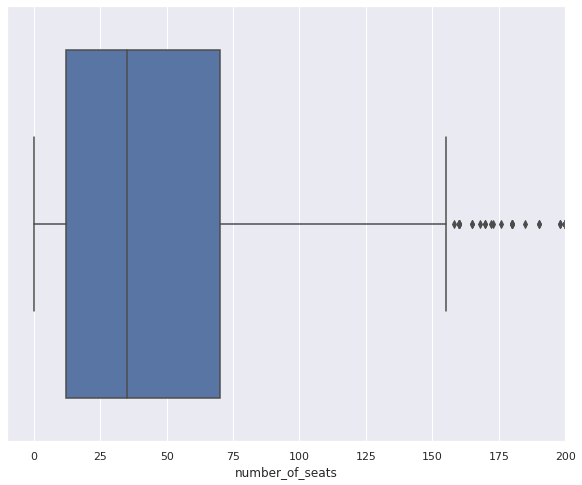

In [57]:
temp = df[df['street_name'].isin(top_10)]
ax = sns.boxplot(x=temp['number_of_seats'])
ax.set_xlim(-10,200)
plt.show()

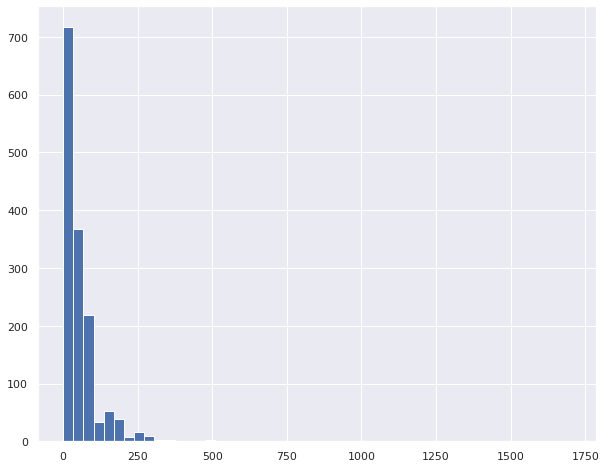

In [58]:
temp['number_of_seats'].hist(bins=50)
plt.show()

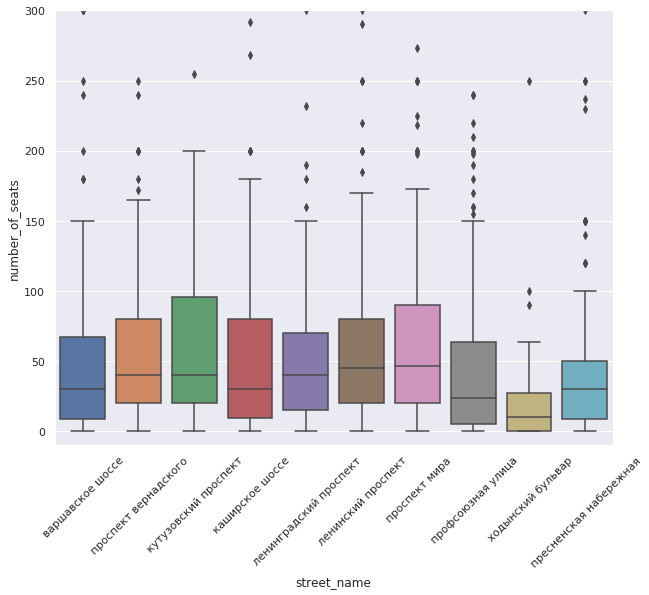

In [59]:
ax = sns.boxplot(x="street_name", y="number_of_seats", data=temp, orient='v')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()

In [60]:
temp['number_of_seats'].describe()

count   1,475.00
mean       55.56
std        88.96
min         0.00
25%        12.00
50%        35.00
75%        70.00
max     1,700.00
Name: number_of_seats, dtype: float64

Метры дорогие, мест немного.

<font color='blue'> Отлично, опять все верно. </font>

<a name="stage_3"></a>
# Шаг №3. Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:
Презентация: <ссылка на облачное хранилище с презентацией>

1. Презентация: https://cloud.mail.ru/public/2DhK/2pTBZt2nb

[К оглавлению](#table_of_contents)

<font color='blue'> В целом хорошая презентаця, но лучше не оставлять одинокий график на слайде, стоит подписывать какие-то минимальные комментарии. Вообще оптиамльное сочетание графики и текста - это и есть искуство презентации. </font>


<font color='blue'> проект выполнен отлично, молодец. </font>